# Neural network that classifies numbers from images
#### Trained on the MNIST data set with Python, using the Keras framework. Utalizes convolutional layers to achieve better results, as well as auto-encoders for denoising. 

In [1]:
# imports
from __future__ import print_function

import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
import numpy as np
import random
from matplotlib import pyplot as plt

In [2]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

# reshape x_train and x_test to 4 dimensional matrix
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

11490434/11490434 [==============================] - 0s 0us/step


#### Explanation of the data pre-processing
The MNIST function load_data() returns a tuple of numpy arrays, (x_train, y_train), (x_test,y_test). The numpy arrays *x_train* and *x_test* contains numerical representations of the grayscale images of the 10 digits, in the form of a pixel values between 0 and 255. The pixel values represents the brightness level of the pixel, 0 is black and  255 is white. Each element in the numpy arrays represents a pixel and holds a value representing its brightness. 

The pixel values are first converted to floats, so that no raounding error occurs, then the pixels are scaled by 255, such that its value is between 0 and 1.  
The *lbl_train* and *lbl_test* are vectors of length #images, that represent the digits that the images are displaying. These vectors are converted to binary matrices of #imagesx#digits <=> 6000x10 with the function *to_categorical()*, where each row represent a digit as a 1 at its corresponding index and all others as zeroes, e.g. $l = [1, 8], \space to\_categoriacal(l) = [[0,1,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,1,0]]$.

In [3]:
# load_data gives data of type uint-8, which are integers
# change to float so as to not have rounding errors
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# changing grey-scale from between 0 & 255 to between 0 & 1
x_train /= 255
x_test /= 255

# .to_categorical() returns "A binary matrix representation of the input. The classes axis is placed last."
# converts the expected number to from a decimal to a set of 10 binary numbers
# the binary number at the "correct position" is set to 1
# i.e. if predicted number is 5 at index 3, then the binary number at index 5 is set to 1 on the third row.
y_train = keras.utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.to_categorical(lbl_test, num_classes)

**The number of neurons in each layer**

1) input layer: 784
2) hidden layer: 64
3) hidden layer: 64
4) output layer: 10 

There are a total of 4 layers in this network, one input with 784 neurons (from the 28 x 28 grid of pixels), 2 hidden layers with 64 neurons each with rectified linear activation functions and finally the output layer with 10 neurons for the 10 digits with the softmax activation layer.

**Activation functions and why they are appropriate for this application**

The Rectified Linear Unit function or ReLu, is the activation function used in the two hidden layers. The ReLu activation function is constructed as: $f(x) = max(0, x)$. It is appropriate for its minimal computational demand, which speeds up the training process compared to other activation functions such, as *sigmoid* or *tanh*. Also, ReLu function doesn't have an asymptotic lower or higher bound, so errors can more easily be accounted for in the first hidden layer, as well as the sparcity of the output, i.e. most values are outputed as zeroes. (not finished)

**Total number of parameters for the network**

Overall, there are 55,050 parameters that the model has to fine tune (train) in the neurons in order to minimize the cost function and get a good model.

**Why the input and output layers have the dimensions they have**

The input layer have 784 dimensions due to the amount of pixels in the images 28x28 = 784. The output layer has 10 dimensions since there are 10 digits and therefore 10 possible outcomes and the purpose of the model is to predict a digit given an image.

**The loss function used to train the network and how to interpret it**

The loss function used is Cross-entropy (or log) loss. It calculates the performance of the classification model that outputs a probability value (i.e. between 0 and 1). The higher the difference between the given probability value and the true value, the higher the loss value. This function can deal with outputs or classes of large numbers which makes it a suitable choice for our model as we have 10 clases and output a value between 0 and 1.

the functional form is:

$L = -\sum_{o=1}^N{\sum_{c=1}^M{y_{o,c}\log{p_{o,c}}}}$

where:
* L is the loss value returned by this function
* M is the number of classess/predictions (represented as *c*) i.e. the 10 digits we are trying to interpret
* N is the total number of observations (represented as *o*) i.e. it is the number of test data
* log is the natural log
* y is the binary indicator if the class label *c* is the right label/class for the predicted label or observation *o*
* p is the predicted probability that the observation *o* is of class *c*

In [4]:
## Define model ##
model = Sequential()
# converts the 28 x 28 matrix to a single row vector of inputs that is 784 (28 times 28) long
model.add(Flatten())
# 2 hidden layers, rectified linear activation function (i.e. linear at positive axis)
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
# output layer, softmax activation function
model.add(Dense(num_classes, activation='softmax'))

# total of 4 layers

# keras.losses.categorical_crossentropy is loss function
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy
model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4621 - accuracy: 0.8693 - val_loss: 0.2447 - val_accuracy: 0.9297
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2272 - accuracy: 0.9338 - val_loss: 0.2074 - val_accuracy: 0.9376
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1772 - accuracy: 0.9486 - val_loss: 0.1605 - val_accuracy: 0.9502
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1469 - accuracy: 0.9567 - val_loss: 0.1424 - val_accuracy: 0.9572
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1255 - accuracy: 0.9628 - val_loss: 0.1353 - val_accuracy: 0.9580
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1093 - accuracy: 0.9675 - val_loss: 0.1112 - val_accuracy: 0.9658
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0972 - accuracy: 0.9715 - val_loss: 0.1070 - val_accuracy: 0.9665
Epoch 

#### Plots of the trained model. For trainnig and test/validation accuracy for each epoch.

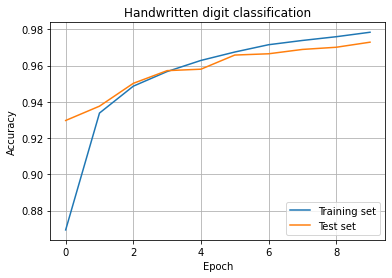

In [5]:
def graph_acc(accuracy, val_accuracy, title=""):
    plt.plot(accuracy)
    plt.plot(val_accuracy)
    plot_title = title if title else 'Handwritten digit classification'
    plt.title(plot_title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training set', 'Test set'], loc='lower right')
    plt.grid(True)
    plt.show()

def graph_acc_bar(accuracies, standard_deviations, regularizations):
    # Build the plot
    x_pos = np.arange(len(regularizations))
    fig, ax = plt.subplots(figsize=(15,8))
    ax.bar(x_pos, accuracies, yerr=standard_deviations, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_ylabel('mean accuracy reached by models')
    ax.set_xlabel('regularization factors')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(regularizations)
    plt.ylim([0.97, 1])
    ax.set_title('effect of regularization factor on model accuracy')
    ax.yaxis.grid(True)

    plt.tight_layout()
    plt.show()

graph_acc(fit_info.history['accuracy'], fit_info.history["val_accuracy"])

#### Updated model, using a three-layered neural network, where the hidden-layers have 500 and 300 hidden units respectively. Trained for 40 epochs. Geoff Hinton claimed that this network could reach a validation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay (L2 regularization of weights (kernels): https://keras.io/api/layers/regularizers/))
#### The code below is an implementation of weight decay on hidden units, where five regularization factors from 0.000001 to 0.001 have been selected. Three replicated networks have been trained for each gegularization factor. The final validation accuracy is plotted with standard deviation (computed from the replicates) as a function of the regularization factor. 

The range of regularization factors used yielded accuracies that were quite close to the maximum that Hinton achieved.
The differences from my result to Hintons result can be attributed to the fact that:

<ol type="a">
  <li>The regularization factors are quite small compared to the large number of datapoints used. As the regularization factor is proportional to the chosen factor and inversely proportional to the amount of data, having a large dataset can lead to minimized effect from the weight regularization.</li>
  <li>It is likely that the model is finding local minima rather than the desired global minimum which would have given the highest accuracy hence the relatively large variation in the model validation accuracies.</li>
  <li>It is possible that using only 40 epochs to train a considerably large network is not enough to reach the accuracy. In other words, using only 40 epochs may be ending the training period shorter than what is needed to optimize the model using the training data.</li>
</ol> 

The exact results can be seen in the plot below.

In [6]:
## creating help functions to create 15 models (3 repeats for 5 different regularization factors) ##
epochs_hinton = 40
def get_hinton_model(l2_value):
    model_hinton = Sequential()
    model_hinton.add(Flatten())
    model_hinton.add(Dense(500, activation = 'relu', kernel_regularizer = keras.regularizers.l2(l2_value)))
    model_hinton.add(Dense(300, activation = 'relu', kernel_regularizer = keras.regularizers.l2(l2_value)))
    model_hinton.add(Dense(num_classes, activation='softmax'))

    model_hinton.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.SGD(lr = 0.1),
            metrics=['accuracy'],)
    return model_hinton

def fit_and_eval(model, x_train, y_train, epochs, x_validation, y_validation, show_prog=1):
    fit_info = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=show_prog, # set to 0 to avoid updates on each epoch to reduce clutter, otherwise set to 1
            validation_data=(x_validation, y_validation))
    score = model.evaluate(x_validation, y_validation, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    return fit_info, score

In [7]:
# Takes at most 1.5 hours to train and tune model in a separate notebook
# seems here it would take approx 4.25 hours to train

optimum_models = {}
regularization_factors = np.linspace(0.00001, 0.0006, 5)
mean = np.zeros(len(regularization_factors))
std = np.zeros(len(regularization_factors))
for factor in regularization_factors:
    print(f"training with a weight decay factor of {factor}")
    repetition_models = {}
    model_acc = np.zeros(3)
    for i in range(0,3):
        print(f"iteration number {i}")
        current_model = get_hinton_model(factor)
        curr_fit, curr_score = fit_and_eval(current_model, x_train, y_train, epochs_hinton, x_test, y_test, 0)
        model_acc[i] = curr_score[1]
    index = np.where(regularization_factors == factor)[0][0]
    std[index] = np.std(model_acc) # standard deviation in repeated models accuracy
    mean[index] = np.mean(model_acc) # mean accuacy of repeated models
    print(f'Model achieved mean accuracy of {mean[index]} plus minus {std[index]}')

training with a weight decay factor of 1e-05
iteration number 0
Test loss: 0.0719950795173645, Test accuracy 0.9818999767303467
iteration number 1
Test loss: 0.07761155813932419, Test accuracy 0.9822999835014343
iteration number 2
Test loss: 0.07545836269855499, Test accuracy 0.9815000295639038
Model achieved mean accuracy of 0.9818999965985616 plus minus 0.00032657982774885147
training with a weight decay factor of 0.00015749999999999998
iteration number 0
Test loss: 0.12336723506450653, Test accuracy 0.9825999736785889
iteration number 1
Test loss: 0.1271558403968811, Test accuracy 0.9822999835014343
iteration number 2
Test loss: 0.12430573999881744, Test accuracy 0.9833999872207642
Model achieved mean accuracy of 0.9827666481335958 plus minus 0.000464282475869132
training with a weight decay factor of 0.000305
iteration number 0
Test loss: 0.11927375197410583, Test accuracy 0.9829000234603882
iteration number 1
Test loss: 0.11522834748029709, Test accuracy 0.9835000038146973
iterati

In [ ]:
# to avoid running the block above everytime the variable is needed, the latest iteration is saved in the variables below
mean = [0.9820999900499979, 0.9820999900499979, 0.9821333289146423, 0.9823333223660787, 0.9812333385149637]
std = [0.00045460719637993325, 0.0005099125311197117, 0.0004988960965998952, 0.0005436563716422689, 0.0019601390285467588]
regularization_factors = np.linspace(0.00001, 0.0006, 5)
graph_acc_bar(mean, std, regularization_factors)
print(mean, std)

#### According to the MNIST database it should be possible to reach 99% accuaracy on the validation data. Below is an implementation of a model using convolutional layers, that has an accuracy greater than 99%. As well as an explanation of the model and the choices made in the process of creating it.

In [8]:
# Optimal regulization_factor for the first dense layer
optimum_l2_value = 0.0001

# Creating the model for the CNN
conv_model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation = 'relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation = 'relu'),
    Conv2D(64, (3, 3), padding='same', activation = 'relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation= 'relu', kernel_regularizer = keras.regularizers.L2(optimum_l2_value)),
    Dense(num_classes, activation='softmax'),
    # A total of five layers and two max pooling sequences. Three convolutional layers and two dense layers.
    # The ReLu activation function is used for all layers except for the output layer that uses softmax.
])

# Compiling the model, keras.losses.categorical_crossentropy used as the loss function
conv_model.compile(loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.SGD(lr = 0.1), 
    metrics=['accuracy'],)

#conv_model.save("Best_performing_model")

In [9]:
# Fit with the digit-data and evaluate the CNN-model
conv_fit, conv_score = fit_and_eval(conv_model, x_train, y_train, 10, x_test, y_test)

Epoch 1/10
469/469 [==============================] - 266s 561ms/step - loss: 0.3430 - accuracy: 0.8992 - val_loss: 0.0930 - val_accuracy: 0.9779
Epoch 2/10
469/469 [==============================] - 218s 464ms/step - loss: 0.0899 - accuracy: 0.9786 - val_loss: 0.0743 - val_accuracy: 0.9827
Epoch 3/10
469/469 [==============================] - 207s 441ms/step - loss: 0.0699 - accuracy: 0.9842 - val_loss: 0.0670 - val_accuracy: 0.9845
Epoch 4/10
469/469 [==============================] - 170s 363ms/step - loss: 0.0586 - accuracy: 0.9877 - val_loss: 0.0555 - val_accuracy: 0.9878
Epoch 5/10
469/469 [==============================] - 180s 383ms/step - loss: 0.0513 - accuracy: 0.9901 - val_loss: 0.0519 - val_accuracy: 0.9891
Epoch 6/10
469/469 [==============================] - 178s 380ms/step - loss: 0.0459 - accuracy: 0.9916 - val_loss: 0.0541 - val_accuracy: 0.9881
Epoch 7/10
469/469 [==============================] - 161s 342ms/step - loss: 0.0417 - accuracy: 0.9930 - val_loss: 0.0551 -

Highest achieved accuracy on the validation data: 0.9900000095367432


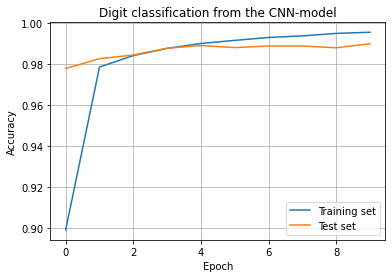

In [10]:
print('Highest achieved accuracy on the validation data:', max(conv_fit.history['val_accuracy']))
graph_acc(conv_fit.history['accuracy'], conv_fit.history['val_accuracy'],
    title = 'Digit classification from the CNN-model')

During the process of trying to create a CNN-model that achived 99%+ accuracy on the validation data, I came up with several different models and approaches. All models I tried included at least one convolutional layer and at most three, one to two max-pooling sequences and different amount of neurons in the first dense layer, ranging from 64-784, as well as an additional dense layer, apart from the output layer, with the same range of neurons. 

The model wI decided on is the one displayed above, which is the best performing model I managed to create. It predicts the validation data with just above 99% accuracy, more specifically $99.05999898910522\%$ accuracy at best.
The CNN-model consists of five layers and two pooling sequences. The feature learning, i.e. the layers and sequences that detects features in the images, consists of three convolutional layers and two max-pooling sequences. The classification, i.e. the layer(s) that classifies the data consists of two dense layers, where one of them is the output layer. 
The first layer is a convolutional layer with 32 filters and filter grid of size 3x3. This layer is followed up with a max-pooling sequence with the size of 2x2. Max-pooling scans the feature maps that the convolutional layer outputs one grid-size at the time, and chooses the maximum value from the feature map covered in the grid. This reduces the dimensions of the feature map which in turn reduces the amount of parameters, which lowers the computational cost, it also helps preventing overfitting. The two predeceeding layers are convolutional layers with 64 filters each. An additional max-pooling sequence is applied afterwards with a 2x2 grid, before flattening the data and classifying it, by means of a dense layer with 100 neurons. 

Dropout was not used in the model. The reasoning behind this choice is that dropouts main purpose is to prevent overfitting of a model, as well as the accuracy of the model being above 99% without using it. For this particular model, overfitting isn't necessarily a problem, since we don't intend to use this model for anything other than digit classification/prediction. The two max-pooling sequences helps in preventing overfitting, since they are used, I believe there is no need for dropout. 

**Why use convolutional layers over fully connected onces for the particular application.**

Convolutional layers allows for the neural network to detect certain patterns in the data, like edges, circles or more complex ones like eyes or accessories, by convolving kernels across the input data. When multiple convolutional layers are applied to a neural network, the patterns are combined, enableing detection of more complex patterns or features in the data. 

Parameter sharing, which is achived by using one kernel throughout the input image, is a desirable component of convolutional layers, which isn't present in fully connected ones. It leads to fewer learned parameters and increases the execution speed with additional help from max pooling, as mentioned above. Too many parameters makes a model prone to overfitting as well, which, when comparing the two, indicates that fully connected layers are more prone to overfitting that convolutional ones.

#### Auto-Encoder for denoising

In order to work with the model and the noise function, the data is reshaped into a single row vector that is 784 dimensional (28x28) where the grid is flattened, such that the pixels are on a single line. Then the noise function can be applied to get a noisy dataset in order to compare the efficiency of the model used. The model uses 2 layers for compressing and encoding the input and another 2 (output included) to decode said compression. The compression factor is $\frac{784}{96}$ which is approximately a factor of 8. The model should be able to reconstruct the input after compression with minimal losses. One can see how the model does this compression and decompression through the decreased number of neurons halfway through (in the encoding layers) where compression happens in 2 steps: first by feeding 784 values to 128 neurons and then feeding the output of those neurons to 96 neurons, effectively reducing the number of datapoints needed to represent a unique digit in a 28x28 pixel grid. The opposite is done in the decompression stage (decoding layers) where the 96 neurons feed to 128 which in turn feed into 784 outputs that can be used to "create" the reconstructed digit in a 28x28 pixel grid.


In [11]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level)) # size is output shape, n is number of digits in output
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    # a and b are either 1 or 0, hence salt and pepper (either white or black)
    c = (a==0) * b # if a is equal to 0, then c = b, otherwise c = 0
    return input * a + c


#data preparation, reshaped into a row vector instead of 28 by 28 matrix of pixels
#adding noise using salt_and_pepper function
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoned = salt_and_pepper(flattened_x_test, noise_level=0.4)

In [12]:
latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image) # using the layer input_image as input to this layer of 128 neurons
encoded = Dense(latent_dim, activation='relu')(encoded) # using previous encoded definition as input to this layer of 96 neurons
decoded = Dense(128, activation='relu')(encoded) # using encoded layer (784, 128, 96) as input to this layer of 128 neurons
decoded = Dense(784, activation='sigmoid')(decoded) # using previous decoded layer (784, 128, 96, 128) as input to this layer of 784 neurons

autoencoder = keras.Model(input_image, decoded) # using all layers i.e. 784, 128, 96, 128, 784
encoder_only = keras.Model(input_image, encoded) # using only encoded layers after input layer i.e. 784, 128, 96

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:]) # only decoded layers, no input layer i.e. 128, 784


decoder = keras.Model(encoded_input, decoder_layer(encoded_input)) # input is encoded input followed by all decoded inputs i.e. 96, 128, 784 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoned, flattened_x_test))

Epoch 1/32
938/938 [==============================] - 11s 11ms/step - loss: 0.1912 - val_loss: 0.1540
Epoch 2/32
938/938 [==============================] - 8s 9ms/step - loss: 0.1471 - val_loss: 0.1407
Epoch 3/32
938/938 [==============================] - 8s 9ms/step - loss: 0.1374 - val_loss: 0.1338
Epoch 4/32
938/938 [==============================] - 8s 9ms/step - loss: 0.1322 - val_loss: 0.1306
Epoch 5/32
938/938 [==============================] - 8s 9ms/step - loss: 0.1290 - val_loss: 0.1290
Epoch 6/32
938/938 [==============================] - 8s 9ms/step - loss: 0.1269 - val_loss: 0.1271
Epoch 7/32
938/938 [==============================] - 8s 9ms/step - loss: 0.1253 - val_loss: 0.1256
Epoch 8/32
938/938 [==============================] - 9s 9ms/step - loss: 0.1240 - val_loss: 0.1251
Epoch 9/32
938/938 [==============================] - 9s 10ms/step - loss: 0.1229 - val_loss: 0.1238
Epoch 10/32
938/938 [==============================] - 10s 10ms/step - loss: 0.1221 - val_loss: 0

**The role of the loss function**

The loss function describes the amount of information lost between the compressed and decompressed representations of the data examples and the decompressed representation, i.e what is lossed in the process of compressing and decompressing. Another way to view it could be to consider it as a function that calculates the reconstruction loss. The loss funciton used here is the same as the loss function in question 2 except we are using binary classification (i.e. there are only 2 classes so M = 2). This means that the loss function can be simplified to:

  $L = \dfrac{1}{N}\sum_{o=1}^N{-(y_o\cdot\log{p_o}+(1-y_o)\cdot\log{(1-p_o)})} $
  
where $y_o$ is the expected output for that observation/data-point and $p_o$ is the probability that that data-point belongs to class *A* ($1-p_o$ is the probability that it is class *B*)

**Increasing levels of noise added to the test set using the salt_and_pepper()-function (0 to 1)**

**A few examples are shown, with the original, "seasoned" (noisy), versions and denoised versions.**

313/313 [==============================] - 1s 2ms/step
Noise-level: 0.0


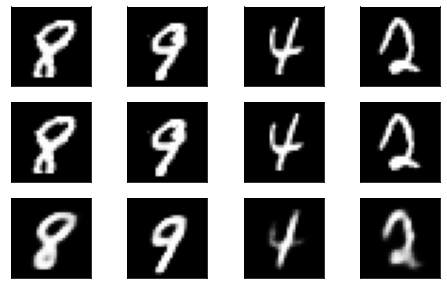

313/313 [==============================] - 1s 4ms/step
Noise-level: 0.25


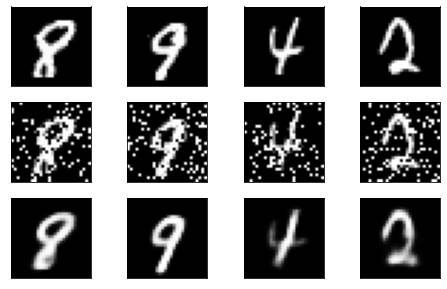

313/313 [==============================] - 1s 4ms/step
Noise-level: 0.5


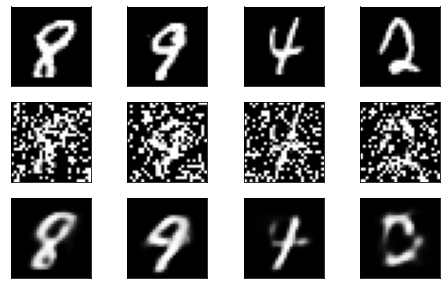

313/313 [==============================] - 1s 3ms/step
Noise-level: 0.75


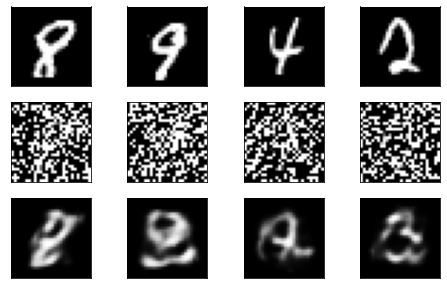

313/313 [==============================] - 1s 3ms/step
Noise-level: 1.0


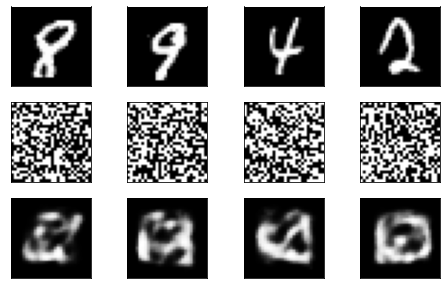

In [14]:
# Plotting the compressed images
noise_levels = np.linspace(0, 1, 5)
nr_images = 4
random_sample = np.random.randint(x_test.shape[0], size=nr_images)
for n in noise_levels:
    # Applying noise to the input
    noisy_images = salt_and_pepper(flattened_x_test, n)
    # Decoded noisy images
    decoded_images = autoencoder.predict(noisy_images)
    print('Noise-level:', n)

    plt.figure(figsize = (8, 5))
    for i, j in enumerate(random_sample):
        # Plot original image
        ax = plt.subplot(3, nr_images, i + 1)
        plt.imshow(flattened_x_test[j].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Plot noisy image
        ax = plt.subplot(3, nr_images, nr_images + i + 1)
        plt.imshow(noisy_images[j].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Plot denoised image
        ax = plt.subplot(3, nr_images, 2*nr_images + i + 1)
        plt.imshow(decoded_images[j].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

As shown above, at noise-level 0.75, the decoded images starts to become indistinguishable. Although, numbers with a more unique shape, like 0, is still somewhat recognizeable. At noise-level 0.5 and below, the decoded images are clearly distinguishable, with exception to the 8 at noise-level 0.5. At noise-level 1 the images are indistinguishable, prehaps one could argue that some digit at a specific iteration is distinguishable, but that is probably with the preconcieved notion that it should be an certain digit. (Since the digits are sampled at random, particular digits mentioned in the text may not appear at the last execution (visualization) of the code).

#### Testing if denoising improves the classification for the best performing model. 

In [15]:
# Not sure if this step below is necessary
# model = keras.models.load_model()

# Best model is the CNN from question 3
best_model = conv_model
prediction_scores_noisy = []
prediction_scores_decoded = []

for n in noise_levels:
    # Add noise to images
    noisy_images2 = salt_and_pepper(flattened_x_test, n)
    # Decode noisy images
    decoded_images2 = autoencoder.predict(noisy_images2)

    # Seasoned dataset for the model (noisy images)
    ni_reshaped = noisy_images2.reshape(len(noisy_images2), 28, 28, 1)
    # Decoded dataset for the model
    di_reshaped = decoded_images2.reshape(len(decoded_images2), 28, 28, 1)

    # Model-prediction of the noisy images
    print(f'Test accuracy of noisy digits at noise-level: {n}')
    ni_info, ni_score = fit_and_eval(conv_model, x_train, y_train, 1, ni_reshaped, y_test, show_prog=1)
    prediction_scores_noisy.append((ni_info, ni_score))
    # Model-prediction of the decoded images
    print(f'Test accuracy of decoded digits at noise-level: {n}')
    di_info, di_score = fit_and_eval(conv_model, x_train, y_train, 1, di_reshaped, y_test, show_prog=1)
    print()
    prediction_scores_decoded.append((di_info, di_score))

313/313 [==============================] - 1s 3ms/step
Test accuracy of noisy digits at noise-level: 0.0
469/469 [==============================] - 162s 344ms/step - loss: 0.0302 - accuracy: 0.9968 - val_loss: 0.0455 - val_accuracy: 0.9906
Test loss: 0.04553382098674774, Test accuracy 0.9905999898910522
Test accuracy of decoded digits at noise-level: 0.0
469/469 [==============================] - 164s 350ms/step - loss: 0.0276 - accuracy: 0.9975 - val_loss: 0.2981 - val_accuracy: 0.9497
Test loss: 0.2981168329715729, Test accuracy 0.9496999979019165

313/313 [==============================] - 1s 3ms/step
Test accuracy of noisy digits at noise-level: 0.25
469/469 [==============================] - 158s 338ms/step - loss: 0.0276 - accuracy: 0.9971 - val_loss: 0.5261 - val_accuracy: 0.8437
Test loss: 0.5260621309280396, Test accuracy 0.8436999917030334
Test accuracy of decoded digits at noise-level: 0.25
469/469 [==============================] - 157s 335ms/step - loss: 0.0255 - accuracy:

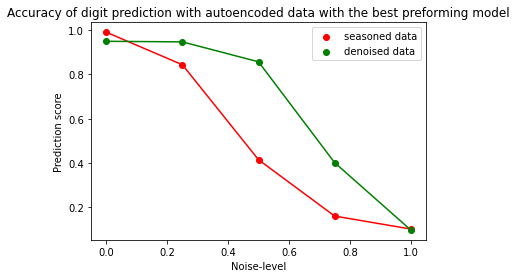

In [16]:
# Plotting the the results attained above as a function of noise-level for the seasoned and denoised datasets. 
n_scores = [s[1] for _, s in prediction_scores_noisy]
d_scores = [s[1] for _, s in prediction_scores_decoded]
#plt.figure(figsize=(10, 5))
plt.scatter(noise_levels, n_scores, c='red', label='seasoned data')
plt.plot(noise_levels, n_scores, c='red')
plt.scatter(noise_levels, d_scores, c='green', label='denoised data')
plt.plot(noise_levels, d_scores, c='green')
plt.title('Accuracy of digit prediction with autoencoded data with the best preforming model')
plt.xlabel('Noise-level')
plt.ylabel('Prediction score')
plt.legend()
plt.show()

The result presented in the graph has several interesting properties. When noise-level = 0, the model performs better on the seasoned data than the denoised data. This may initially seem surprising, but when inspecting closer it has an obvious answer. The seasoned data isn't actually seasoned at noise-level: 0, so the model performs as well as it can (at one epoch). The denoised data however, is processed and the autoencoder doesn't always succeed in recreating the data (digits) from the laten space, leading to some data being more difficult to predict than with the unmodified data. At all other noise-levels however, except for noise-level 1, the model performs significantly better on the denoised data, i.e. the recreated data, than the seasoned data. My assumption from the result before seems to be correct when interpeting the results; after noise-level: 0.5 the images from the auto-encoder starts to become indistinguishable.

**How the decoder part of the denoising auto-encoder can be used to generate synthetic "hand-written" digits**

In order to create unique "hand-written" digits, one can use the auto-encoder (or just the encoder) in conjunction with the decoder. One can use the training data from beforehand and approach the problem where we use the autoencoder to create new, never before seen by the model, digits. Then use the image of the handwritten digit as input to the autoencoder and through the lossy compression creates a new handwritten digit, similar to the input. If one wants to alter the handwritten digit even more a certain amount of noise can be introduced as was done in the parts above.


313/313 [==============================] - 2s 6ms/step


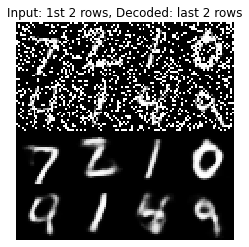

In [17]:
x_decoded = autoencoder.predict(flattened_x_test_seasoned)

imgs = np.concatenate([flattened_x_test_seasoned[:8], x_decoded[:8]])
imgs = imgs.reshape((4, 4, 28, 28))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()